In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font',  family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.svm import SVC

# 1.Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [4]:
pd.set_option('display.max_columns',None)
# df_raw = pd.read_csv('wo_thin.csv', engine='python', encoding='cp949')
df_raw = pd.read_csv('/Users/dasol/Documents/Job/Ìè¨Ïä§ÏΩîÏïÑÏπ¥Îç∞ÎØ∏/Í∞ïÏùòÏûêÎ£å/Ìè¨Ïä§ÏΩî/ÎπÖÎç∞Ïù¥ÌÑ∞ÌîÑÎ°úÏ†ùÌä∏/A2_Ïã†Ïö©Ïπ¥Îìú/df_final.csv', engine='python')#, encoding='cp949')

In [5]:
df_raw.columns

Index(['chaju_id', 'credit_class', 'score_risk', 'gender', 'age', 'agegroup',
       'job', 'edu', 'dwell_type', 'house_type', 'marriage', 'income_home_grp',
       'income_ind_grp', 'expenditure_grp', 'child_cd', 'no_child',
       'flag_priv_biz_cd', 'net_income', 'family_size', 'income_person',
       'card_count', 'loan_amt', 'loan_dur', 'loan_count', 'over_amt',
       'over_dur', 'over_count', 'is_overdue', 'sum_loan_at_time',
       'sum_cashservice_3y', 'sum_cardloan_3y', 'no_cashservice_3y',
       'no_cardloan_3y', 'no_creditcard_over', 'sum_creditcard_over',
       'max_loan_amt', 'max_over_amt', 'income_ind_test', 'expend_ind_test',
       'ind_net_income', 'loan_at_time_div_by_net', 'cardloan_no_diff_com',
       'cashservice_no_diff_com'],
      dtype='object')

In [6]:
# 1. Í∏∞Ï°¥ Î™®Îç∏Í≥ºÏùò KSÌÜµÍ≥ÑÎüâ ÎπÑÍµêÏãú ÏÇ¨Ïö©ÌïòÎäî Îç∞Ïù¥ÌÑ∞: Í∏∞Ï°¥ Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö©Ìïú Î≥ÄÏàòÎì§Í≥º ÎπÑÏä∑Ìïú Î≥ÄÏàòÎì§Îßå ÏÇ¨Ïö©ÌïòÎäî Î≤ÑÏ†Ñ
# data=df_raw[['is_overdue','agegroup','job','edu','dwell_type','house_type','marriage',
#              'income_home_grp','expenditure_grp','card_count','loan_count',
#               'flag_priv_biz_cd', 'loan_amt',
#              'over_count','over_amt']]
# data['loan_amt']=np.log10(data['loan_amt']+1) # Í∏àÏï°Ïùò Î≤îÏúÑÍ∞Ä ÎÑàÎ¨¥ Îã§ÏñëÌïòÎØÄÎ°ú logÎ°ú Î≥ÄÌôò + Í∏àÏï°Ïù¥0Ïùº Í≤ΩÏö∞ log ÏóêÎü¨ Î∞©ÏßÄÎ•º ÏúÑÌï¥ +1
# data['over_amt']=np.log10(data['over_amt']+1)

# 2. ÏµúÏ¢Ö Î™®Îç∏ÏóêÏÑú ÏÇ¨Ïö©Ìïú Îç∞Ïù¥ÌÑ∞: Í∏∞Ï°¥ Î™®Îç∏ Î≥ÄÏàòÎì§ - (ÎåÄÏ∂úÍ∏àÏï°, Ïó∞Ï≤¥Í∏àÏï°) + ÌååÏÉù Î≥ÄÏàò
data = df_raw[['gender','agegroup','job','edu','dwell_type', 'house_type', 'flag_priv_biz_cd', 'card_count', 'loan_dur','loan_count',
 'over_dur', 'over_count', 'is_overdue', 'loan_at_time_div_by_net', 'cardloan_no_diff_com', 'cashservice_no_diff_com']]

In [7]:
list(data.columns)

['gender',
 'agegroup',
 'job',
 'edu',
 'dwell_type',
 'house_type',
 'flag_priv_biz_cd',
 'card_count',
 'loan_dur',
 'loan_count',
 'over_dur',
 'over_count',
 'is_overdue',
 'loan_at_time_div_by_net',
 'cardloan_no_diff_com',
 'cashservice_no_diff_com']

# ordinal encoding

In [8]:
numerical_feats = data.dtypes[data.dtypes != "object"].index.tolist()
numerical_feats.remove('is_overdue')
print(numerical_feats)
print("Number of Numerical features: ", len(numerical_feats))
print('\n')

categorical_feats = data.dtypes[data.dtypes == "object"].index.tolist()
print(categorical_feats)
print("Number of Categorical features: ", len(categorical_feats))

['card_count', 'loan_dur', 'loan_count', 'over_dur', 'over_count', 'loan_at_time_div_by_net', 'cardloan_no_diff_com', 'cashservice_no_diff_com']
Number of Numerical features:  8


['gender', 'agegroup', 'job', 'edu', 'dwell_type', 'house_type', 'flag_priv_biz_cd']
Number of Categorical features:  7


In [9]:
from category_encoders.ordinal import OrdinalEncoder
encoder = OrdinalEncoder(categorical_feats)
data[categorical_feats] = encoder.fit_transform(data[categorical_feats], data['is_overdue'])
# test[categorical_feats] = encoder.transform(test[categorical_feats])

df_raw_y=data["is_overdue"]
df_raw_x=data.drop("is_overdue",axis=1,inplace=False)

/Users/dasol/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# train, test Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

In [10]:
# Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±ÌïòÍ∏∞ - Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=100)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(1294, 15)
train data Y size :(1294,)
test data X size :(555, 15)
test data Y size :(555,)


# 3. SVC Î™®Îç∏ ÏÉùÏÑ±



## hyper parameter ÌäúÎãù Ï†Ñ Î™®Îç∏ Ï†ïÌôïÎèÑ

#### randomstate(Ï¥àÍ∏∞ ÏûêÎ£å ÏÑ†ÌÉù Í∏∞Ï§Ä)Î•º 100ÏúºÎ°ú Î≥ÄÍ≤Ω

Accuracy on svm_uncustomized training set:0.902
Accuracy on svm_uncustomized test set:0.875

In [11]:
svm_uncustomized=SVC(random_state=100)
svm_uncustomized.fit(df_train_x,df_train_y)

#train Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm_uncustomized training set:{:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
#test Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm_uncustomized test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on svm_uncustomized training set:0.950
Accuracy on svm_uncustomized test set:0.942


# 4-1. Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï 1: Cost =>10ÏÑ†ÌÉù

## 4-1-1. Cost(0.01~10)Ïóê Îî∞Î•∏ accuracy Î≥ÄÌôî

In [12]:
train_accuracy = []; test_accuracy =[]
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=100)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["Train Accuracy"]=train_accuracy
df_accuracy_c["Test Accuracy"]=test_accuracy

In [13]:
df_accuracy_c.round(3)

C  Train Accuracy  Test Accuracy
0   0.01           0.836          0.820
1   0.10           0.938          0.942
2   1.00           0.950          0.942
3  10.00           0.961          0.942

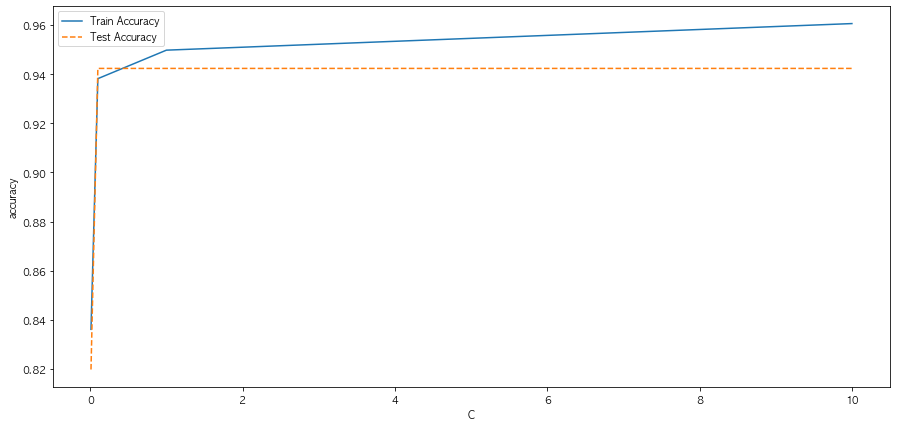

In [14]:
plt.figure(figsize=(15,7))
plt.plot(para_c,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle='--',label="Test Accuracy")
# plt.axvline(x=1, linestyle='--', c='r', label='Ï£ºÏÑ±Î∂Ñ 2Î≤à')
plt.ylabel("accuracy");plt.xlabel("C")
plt.legend()

# 4-2.Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï 2: gamma =>0.05ÏÑ†ÌÉù

- gammaÌååÎùºÎ©îÌÑ∞ÎûÄ?

gammaÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÏòÅÌñ•Î†•Ïùò Í±∞Î¶¨ÏôÄ Î∞òÎπÑÎ°ÄÍ¥ÄÍ≥ÑÏù¥Îã§.

gammaÍ∞Ä ÌÅ¥ÏàòÎ°ù 1Í∞ú Îç∞Ïù¥ÌÑ∞Ïùò ÏòÅÌñ•Î†• Í±∞Î¶¨Í∞Ä ÏßßÏïÑÏ†∏ Í≥ºÏ†ÅÌï© ÏúÑÌóòÏù¥ ÏûàÎã§.

### SVC Î™®Îç∏Ïùò default ÏÑ§Ï†ïÍ∞í ÌôïÏù∏

In [15]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## 4-2-1. gamma(0.01~1)Ïóê Îî∞Î•∏ accuracy Î≥ÄÌôî


In [16]:
train_accuracy = []; test_accuracy =[]
para_gamma = [10**gamma for gamma in range(-2,1)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma,C=0.8,random_state=100)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["TestAccuracy"]=test_accuracy

In [17]:
df_accuracy_gamma.round(4)

gamma  TrainAccuracy  TestAccuracy
0   0.01         0.9490        0.9423
1   0.10         0.9714        0.9279
2   1.00         0.8756        0.8198

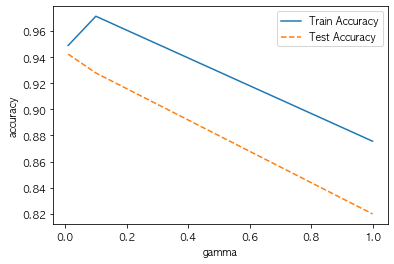

In [18]:
plt.plot(para_gamma,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle='--',label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("gamma")
plt.legend()

# 5.Scale Î≥ÄÌôò

## ÌïÑÏöîÏÑ±:
SVMÏùÄ Î≥ÄÏàòÍ∞Ñ Í±∞Î¶¨Î•º Í∏∞Î∞òÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Íµ∞ÏùÑ ÎÇòÎàÑÎäî Î∞©Î≤ïÏù¥ÎØÄÎ°ú,

Î≥ÄÏàòÍ∞Ñ scale Ï∞®Ïù¥Í∞Ä ÌÅ∞ Í≤ΩÏö∞ Í≤∞Í≥º ÎèÑÏ∂úÏóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÎã§.

Îî∞ÎùºÏÑú ÏÑ§Î™ÖÎ≥ÄÏàò Í∞íÏùò Íµ¨Í∞ÑÏùÑ ÎèôÏùºÌïòÍ≤å Î≥ÄÌôòÌïòÎäî StandardscalerÎ•º Ï†ÅÏö©ÌïòÏòÄÎã§.

### Scale Î≥ÄÌôò Í≤∞Í≥º: ÌèâÍ∑†Ïù¥ 0,  ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 1Î°ú Î≥ÄÌôòÎêú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

In [25]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.describe()

gender      agegroup           job           edu    dwell_type  \
count  1.849000e+03  1.849000e+03  1.849000e+03  1.849000e+03  1.849000e+03   
mean   4.918846e-16 -4.371240e-17 -9.901340e-17  4.601286e-17 -4.215125e-17   
std    1.000271e+00  1.000271e+00  1.000271e+00  1.000271e+00  1.000271e+00   
min   -9.044846e-01 -1.360578e+00 -1.179163e+00 -1.046000e+00 -4.697739e-01   
25%   -9.044846e-01 -7.605999e-01 -7.258838e-01 -1.046000e+00 -4.697739e-01   
50%   -9.044846e-01 -1.606216e-01 -2.726048e-01  2.431212e-02 -4.697739e-01   
75%    1.105602e+00  1.039335e+00  1.087232e+00  5.594683e-01 -4.697739e-01   
max    1.105602e+00  2.239292e+00  1.540511e+00  3.770405e+00  6.369690e+00   

         house_type  flag_priv_biz_cd    card_count      loan_dur  \
count  1.849000e+03      1.849000e+03  1.849000e+03  1.849000e+03   
mean   4.448097e-16      7.037817e-16  4.803561e-17 -1.911517e-16   
std    1.000271e+00      1.000271e+00  1.000271e+00  1.000271e+00   
min   -7.192858e-01     -3.304212e-01 -1.343234e+00 -1.163409e+00   
25%   -7.192858e-01     -3.304212e-01 -7.032856e-01 -1.163409e+00   
50%   -7.192858e-01     -3.304212e-01 -6.333724e-02  2.634532e-02   
75%    3.717392e-01     -3.304212e-01  5.766112e-01  9.186610e-01   
max    4.735839e+00      3.026440e+00  3.776353e+00  1.414392e+00   

         loan_count      over_dur    over_count  loan_at_time_div_by_net  \
count  1.849000e+03  1.849000e+03  1.849000e+03             1.849000e+03   
mean  -8.598374e-17  1.302966e-16  3.465169e-16            -5.795496e-16   
std    1.000271e+00  1.000271e+00  1.000271e+00             1.000271e+00   
min   -8.349304e-01 -4.333096e-01 -3.792245e-01            -1.201424e+00   
25%   -8.349304e-01 -4.333096e-01 -3.792245e-01            -7.360926e-01   
50%   -4.396958e-01 -4.333096e-01 -3.792245e-01            -6.585928e-01   
75%    3.507734e-01 -4.333096e-01 -3.792245e-01             5.163892e-01   
max    4.303119e+00  2.895473e+00  8.237502e+00             3.521152e+00   

       cardloan_no_diff_com  cashservice_no_diff_com  
count          1.849000e+03             1.849000e+03  
mean           2.166406e-16            -1.621202e-16  
std            1.000271e+00             1.000271e+00  
min           -4.044616e-01            -4.677757e-01  
25%           -4.044616e-01            -4.677757e-01  
50%           -4.044616e-01            -4.677757e-01  
75%           -4.044616e-01            -4.677757e-01  
max            6.425214e+00             5.112336e+00

## Scale Î≥ÄÌôò Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞ÏôÄ, C=10,gamma=0.05Î°ú ÌïôÏäµÌïú Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ

In [22]:
svm_original = SVC(C=10,gamma=0.05,random_state=100)
svm_original.fit(df_train_x,df_train_y)

#train Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm scale Ïù¥Ï†Ñ training set:{:.3f}".format(svm_original.score(df_train_x,df_train_y)))
#test Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm scaled Ïù¥Ï†Ñ test set:{:.3f}".format(svm_original.score(df_test_x,df_test_y)))

Accuracy on svm scale Ïù¥Ï†Ñ training set:0.992
Accuracy on svm scaled Ïù¥Ï†Ñ test set:0.932


# 6.Scale Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î°ú SVM Î™®Îç∏ ÏÉùÏÑ±
## Scale Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î°ú train, test Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

## Î™®Îç∏ Ï†ïÌôïÎèÑ


In [23]:
df_scaled_train_x, df_scaled_test_x, = train_test_split(df_scaled, test_size = 0.3, random_state=100)
print("train data X szie {}".format(df_scaled_train_x.shape))
print("test data Y szie {}".format(df_scaled_test_x.shape))

train data X szie (1294, 15)
test data Y szie (555, 15)


In [24]:
svm_scaled = SVC(random_state=100)
svm_scaled.fit(df_scaled_train_x,df_train_y)
#train Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm scale Ïù¥ÌõÑ training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x,df_train_y)))
#test Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm_scale Ïù¥ÌõÑ test set:{:.3f}".format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on svm scale Ïù¥ÌõÑ training set:0.954
Accuracy on svm_scale Ïù¥ÌõÑ test set:0.942


# 7-1. Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï: Cost =>1ÏÑ†ÌÉù
train, test Ï†ïÌôïÎèÑÍ∞Ä 95% Ï†ïÎèÑÎ°ú ÎÜíÍ≥† train, test Ï†ïÌôïÎèÑ Ï∞®Ïù¥Í∞Ä ÏûëÏùÄ 1 ÏÑ†ÌÉù

In [26]:
train_accuracy = []; test_accuracy =[]
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=100)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["TestAccuracy"]=test_accuracy

In [27]:
df_accuracy_c.round(4)

C  TrainAccuracy  TestAccuracy
0   0.01         0.8362        0.8198
1   0.10         0.9312        0.9189
2   1.00         0.9536        0.9423
3  10.00         0.9791        0.9315

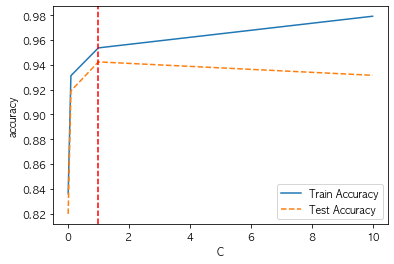

In [28]:
plt.plot(para_c,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle='--',label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("C")
plt.axvline(x=1, linestyle='--', c='r')
plt.legend()

# 7-2.Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï : gamma =>0.1ÏÑ†ÌÉù


## 7-2-1. gamma(0.01~10)Ïóê Îî∞Î•∏ accuracy Î≥ÄÌôî


In [29]:
train_accuracy = []; test_accuracy =[]
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma,C=1,random_state=100)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["TestAccuracy"]=test_accuracy

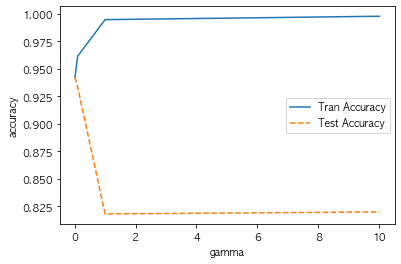

In [30]:
df_accuracy_c.round(3)
plt.plot(para_c,train_accuracy,linestyle='-',label="Tran Accuracy")
plt.plot(para_c,test_accuracy,linestyle='--',label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("gamma")
plt.legend()

## 7-2-2. gamma(0.1~0.5)Ïóê Îî∞Î•∏ accuracy Î≥ÄÌôî
gammaÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ÏÑú test Ï†ïÌôïÎèÑÍ∞Ä Í∏âÍ≤©Ìûà Í∞êÏÜåÌïòÎØÄÎ°ú 0.1ÏùÑ ÏÑ†ÌÉùÌñàÏäµÎãàÎã§.

In [31]:
train_accuracy = []; test_accuracy =[]
para_gamma = [gamma*0.1 for gamma in range(1,5)]


for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma,C=1,random_state=100)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["TestAccuracy"]=test_accuracy

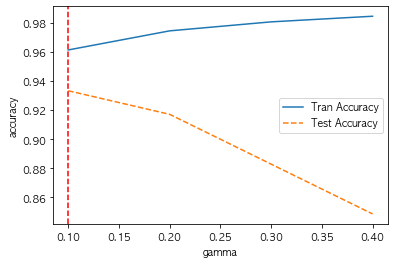

In [32]:
df_accuracy_c.round(3)
plt.plot(para_gamma,train_accuracy,linestyle='-',label="Tran Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle='--',label="Test Accuracy")
plt.axvline(x=0.1, linestyle='--', c='r')
plt.ylabel("accuracy");plt.xlabel("gamma")
plt.legend()

In [33]:
df_accuracy_gamma.round(4)

gamma  TrainAccuracy  TestAccuracy
0    0.1         0.9614        0.9333
1    0.2         0.9745        0.9171
2    0.3         0.9807        0.8829
3    0.4         0.9845        0.8486

## GridSearchCVÎ•º ÌÜµÌïú Hyperparemter ÌÉêÏÉâÍ≥º Î™®Îç∏ Ï†ïÌôïÎèÑ

In [54]:
estimaotr = SVC(random_state=100)
param_grid={"C":para_c,"gamma":para_gamma}
grid_rf=GridSearchCV(estimaotr,param_grid,scoring="accuracy",n_jobs=-1)
grid_rf.fit(df_scaled_train_x,df_train_y)
print("best estimator model:\n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score \n{}".format(grid_rf.best_score_.round(3)))

best estimator model:
SVC(C=1, gamma=0.1, random_state=100)

best parameter:
{'C': 1, 'gamma': 0.1}

best score 
0.935


# 8.ÏµúÏ¢Ö Î™®Îç∏
# 1) ÌïòÏù¥ÌçºÌååÎùºÎ©îÌÑ∞ ( C =1, gamma=0.1 )
C, gamma ÌååÎùºÎ©îÌÑ∞ ÌäúÎãùÌïú Í≤∞Í≥ºÏôÄ GridSearchCVÎ°ú ÎèÑÏ∂úÌïú ÌïòÏù¥ÌçºÌååÎùºÎ©îÌÑ∞Í∞Ä ÏùºÏπòÌïòÏó¨ ÏÑ†ÌÉùÌïòÏòÄÎã§.

# 2) Î™®Îç∏ ÌèâÍ∞Ä

## üìå Ìï¥ÏÑù: accuracy

C, gamma ÌååÎùºÎ©îÌÑ∞ ÌäúÎãùÌïú SVM Î™®Îç∏Ïùò test Ï†ïÌôïÎèÑÎäî 93.3%ÏúºÎ°ú ÌäúÎãù Ï†Ñ 94.2%Î≥¥Îã§ 0.9 Í∞êÏÜåÌïòÏòÄÎã§.

C, gamma ÌååÎùºÎ©îÌÑ∞ ÌäúÎãùÌïú SVM Î™®Îç∏ÏùÄ RandomForest Î™®Îç∏Ïùò test Ï†ïÌôïÎèÑ 93.2%Î≥¥Îã§ 0.1 Ï¶ùÍ∞ÄÌïòÏòÄÏúºÎØÄÎ°ú Ï†ïÌôïÎèÑÎ©¥ÏóêÏÑ† ÎπÑÏä∑Ìïú ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏Îã§.


## üìå Ìï¥ÏÑù: f1-score
C, gamma ÌååÎùºÎ©îÌÑ∞ ÌäúÎãùÌïú SVM Î™®Îç∏Ïùò Î™©Ìëú Î≥ÄÏàò 1Í∏∞Ï§Ä f1-scoreÏùÄ 0.827ÏúºÎ°ú RandomForest Î™®Îç∏ Í≤∞Í≥ºÏù∏ 0.81Î≥¥Îã§ ÌÅ¨Îã§.

# 3) Î™®Îç∏ ÏÑ†ÌÉù
## üìå Í≤∞Î°†: 
### C, gamma ÌååÎùºÎ©îÌÑ∞ ÌäúÎãùÌïú SVM Î™®Îç∏Ïù¥ RandomForest Î™®Îç∏Î≥¥Îã§ AccuracyÏôÄ f1-scoreÏùÄ ÎÜíÎã§.

### ÌïòÏßÄÎßå Ïã†Ïö©ÌèâÏ†êÏãúÏä§ÌÖúÏóê Ï§ëÏöîÌïú ÏÑ±Îä•ÏßÄÌëúÏù∏ "Î≥ÄÎ≥ÑÎ†•"ÏùÄ 43.8%Î°ú RFÎ™®Îç∏Ïùò 65%Î≥¥Îã§ ÌòÑÏ†ÄÌïòÍ≤å ÎÇÆÏúºÎ©∞ Í∏∞Ï°¥ Ïã†Ïö©ÌèâÏ†êÏãúÏä§ÌÖú 39.4%Î≥¥Îã§ ÌÅ¨Í≤å Ï¶ùÍ∞ÄÌïòÏßÄ ÏïäÏïòÎã§.

### Îî∞ÎùºÏÑú RFÎ™®Îç∏ÏùÑ ÏµúÏ¢Ö Î™®Îç∏Î°ú ÏÑ†Ï†ïÌïòÏòÄÎã§.

In [34]:
list(df_scaled_train_x.columns)

['gender',
 'agegroup',
 'job',
 'edu',
 'dwell_type',
 'house_type',
 'flag_priv_biz_cd',
 'card_count',
 'loan_dur',
 'loan_count',
 'over_dur',
 'over_count',
 'loan_at_time_div_by_net',
 'cardloan_no_diff_com',
 'cashservice_no_diff_com']

In [35]:
svc_final = SVC(gamma=0.1,C=1,random_state=100, probability=True, kernel='linear')
svc_final.fit(df_scaled_train_x,df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
print("Accuracy on training set:{:.3f}".format(svc_final.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svc_final.score(df_scaled_test_x,df_test_y)))
print("\nAccuracy on test set\n:{}".format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set:0.943
Accuracy on test set:0.941

Accuracy on test set
:[[443  12]
 [ 21  79]]
              precision    recall  f1-score   support

         0.0      0.955     0.974     0.964       455
         1.0      0.868     0.790     0.827       100

    accuracy                          0.941       555
   macro avg      0.911     0.882     0.896       555
weighted avg      0.939     0.941     0.939       555



In [36]:
prob = svc_final.predict_proba(df_scaled)
prob

array([[0.94781541, 0.05218459],
       [0.98715478, 0.01284522],
       [0.95351212, 0.04648788],
       ...,
       [0.98352899, 0.01647101],
       [0.98848282, 0.01151718],
       [0.95322989, 0.04677011]])

In [37]:
prob_1_score = [i*1000 for i in prob[:,1]]

Text(0, 0.5, 'Prob * 1000')

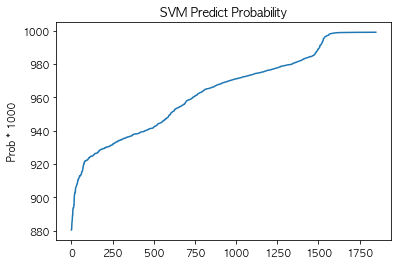

In [38]:
import numpy as np

risk_score = [(1-1/i)*1000 for i in prob_1_score]

sns.lineplot(x=range(len(prob_1_score)), y=sorted(risk_score))

plt.title('SVM Predict Probability')
plt.ylabel('Prob * 1000')

In [39]:
risk_score

[980.8372540856116,
 922.1500042227849,
 978.4890190711066,
 937.001794439319,
 974.7288987373688,
 966.0064995057463,
 950.8508412456559,
 984.5108950668301,
 973.018708647165,
 923.8564505432846,
 929.7369919872963,
 915.1916294760236,
 976.1104393613645,
 947.6038109603232,
 944.1718233029286,
 943.4618108374326,
 944.7236966026844,
 998.9667453240759,
 974.294479831434,
 962.6198338498751,
 976.800249023442,
 942.9245179871591,
 939.4718551705953,
 955.8166011785814,
 939.1176415484899,
 930.8333496058495,
 942.5427419520033,
 998.795688613735,
 978.8220045687816,
 928.9525469217656,
 934.7829527191244,
 974.5357631480823,
 939.6484774359255,
 998.8309570284555,
 981.2889626974354,
 919.3516270761262,
 998.9556393028384,
 954.1605772683394,
 957.9576789115347,
 950.6503864534774,
 968.8647147305815,
 958.7979835350096,
 998.1859911337538,
 998.8445343880097,
 983.6285844248897,
 997.9311646756798,
 955.229693914343,
 998.9999973609372,
 931.8754027065573,
 944.0866436208738,
 985.3

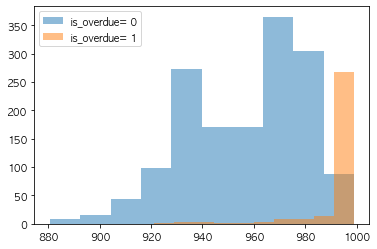

In [40]:
df = pd.DataFrame({'risk_score':risk_score})
df['is_overdue'] = df_raw_y


plt.hist(df[df['is_overdue']==0]['risk_score'], alpha=0.5, label='is_overdue= 0')
plt.hist(df[df['is_overdue']==1]['risk_score'], alpha=0.5, label='is_overdue= 1')
plt.legend()
plt.show()

In [41]:
def cal_credit_class(risk_score):    
    df = pd.DataFrame({'risk_score':risk_score})
    df['class'] = risk_score
    df['is_overdue'] = df_raw_y
    df.loc[df['risk_score'] < 930, 'class'] = 'un_C03'
    df.loc[((df['risk_score'] >= 930)&(df['risk_score'] < 940)), 'class'] = 'C04'
    df.loc[((df['risk_score'] >= 940)&(df['risk_score'] < 950)), 'class'] = 'C05'
    df.loc[((df['risk_score'] >= 950)&(df['risk_score'] < 960)), 'class'] = 'C06'
    df.loc[(df['risk_score'] >= 960), 'class'] = 'over_C07'
    return df

df_class = cal_credit_class(risk_score)
df_class

risk_score     class  is_overdue
0     980.837254  over_C07         1.0
1     922.150004    un_C03         0.0
2     978.489019  over_C07         0.0
3     937.001794       C04         0.0
4     974.728899  over_C07         0.0
...          ...       ...         ...
1844  988.333004  over_C07         0.0
1845  974.963006  over_C07         0.0
1846  939.287267       C04         0.0
1847  913.173160    un_C03         0.0
1848  978.618823  over_C07         0.0

[1849 rows x 3 columns]

In [42]:
table=pd.crosstab(df_class['class'],df_class['is_overdue'], margins=True)

In [43]:
table

is_overdue   0.0  1.0   All
class                      
C04          235    2   237
C05          150    4   154
C06          135    2   137
over_C07     809  301  1110
un_C03       208    3   211
All         1537  312  1849

In [44]:
table = table.reindex(index=['un_C03','C04','C05','C06','over_C07','All'])

In [45]:
table

is_overdue   0.0  1.0   All
class                      
un_C03       208    3   211
C04          235    2   237
C05          150    4   154
C06          135    2   137
over_C07     809  301  1110
All         1537  312  1849

In [46]:
table['0_cum']=table[0.0]/1537


In [47]:
table

is_overdue   0.0  1.0   All     0_cum
class                                
un_C03       208    3   211  0.135329
C04          235    2   237  0.152895
C05          150    4   154  0.097593
C06          135    2   137  0.087833
over_C07     809  301  1110  0.526350
All         1537  312  1849  1.000000

In [48]:
table['1_cum']=table[1.0]/312
table

is_overdue   0.0  1.0   All     0_cum     1_cum
class                                          
un_C03       208    3   211  0.135329  0.009615
C04          235    2   237  0.152895  0.006410
C05          150    4   154  0.097593  0.012821
C06          135    2   137  0.087833  0.006410
over_C07     809  301  1110  0.526350  0.964744
All         1537  312  1849  1.000000  1.000000

In [49]:
ks_fin=table[['0_cum','1_cum']]
ks_fin

is_overdue     0_cum     1_cum
class                         
un_C03      0.135329  0.009615
C04         0.152895  0.006410
C05         0.097593  0.012821
C06         0.087833  0.006410
over_C07    0.526350  0.964744
All         1.000000  1.000000

In [50]:
ks_fin['index'] = ks_fin.index
ks_fin

<ipython-input-50-ca921d0f5812>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_fin['index'] = ks_fin.index


is_overdue     0_cum     1_cum     index
class                                   
un_C03      0.135329  0.009615    un_C03
C04         0.152895  0.006410       C04
C05         0.097593  0.012821       C05
C06         0.087833  0.006410       C06
over_C07    0.526350  0.964744  over_C07
All         1.000000  1.000000       All

In [51]:
ks_fin['0_cum']=  ks_fin['0_cum'].cumsum()
ks_fin['1_cum']=  ks_fin['1_cum'].cumsum()
ks_fin

<ipython-input-51-1e996fe2d868>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_fin['0_cum']=  ks_fin['0_cum'].cumsum()
<ipython-input-51-1e996fe2d868>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks_fin['1_cum']=  ks_fin['1_cum'].cumsum()


is_overdue     0_cum     1_cum     index
class                                   
un_C03      0.135329  0.009615    un_C03
C04         0.288224  0.016026       C04
C05         0.385817  0.028846       C05
C06         0.473650  0.035256       C06
over_C07    1.000000  1.000000  over_C07
All         2.000000  2.000000       All

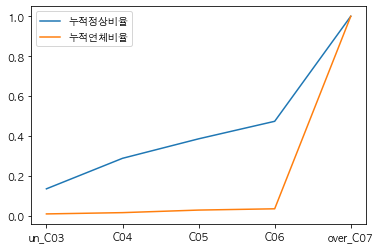

In [52]:
ks_fin=ks_fin.drop(index=['All'])
plt.plot(ks_fin['index'], ks_fin['0_cum'],label='ÎàÑÏ†ÅÏ†ïÏÉÅÎπÑÏú®')
plt.plot(ks_fin['index'],ks_fin['1_cum'],label='ÎàÑÏ†ÅÏó∞Ï≤¥ÎπÑÏú®')

plt.legend()

# üìå K-S ÌÜµÍ≥ÑÎüâ

In [53]:
round(abs(ks_fin['1_cum']-ks_fin['0_cum']).max(), 5)*100

43.839